<a href="https://colab.research.google.com/github/201524495/201524495/blob/main/Practice_2_250708_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 3

In [ ]:
# 필요한 라이브러리를 먼저 불러옵니다 (어제 썼던 라이브러리 3개)
import matplotlib.pyplot as plt
import pandas as pd

# 그래프가 notebook 안에 바로 보이도록 설정합니다
%matplotlib inline

# 실험 재현을 위해
import numpy as np
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Paramter Estimation
### 모수의 점추정(point estimation)

In [ ]:
# 예제: 평균 키 추정
# 모집단을 대신할 수 있는 데이터를 샘플링합니다.

def sample_heights():
  # 모집단 평균은 170, 표준편차는 10인 정규분포에서 100명 샘플을 뽑아 봅니다.
  heights = np.random.normal(loc=170, scale=10, size=100)
  return heights

heights = sample_heights()
# (복습) 표본 평균과 표본 분산을 구해봅니다.
sample_mean = np.mean(heights)
sample_std = np.std(heights, ddof=1)  # (n-1)로 나눠주기 위한 ddof=1 적용

print(f"표본 평균 (점추정값): {sample_mean:.2f} cm")
print(f"표본 표준편차: {sample_std:.2f} cm")

표본 평균 (점추정값): 168.96 cm
표본 표준편차: 9.08 cm


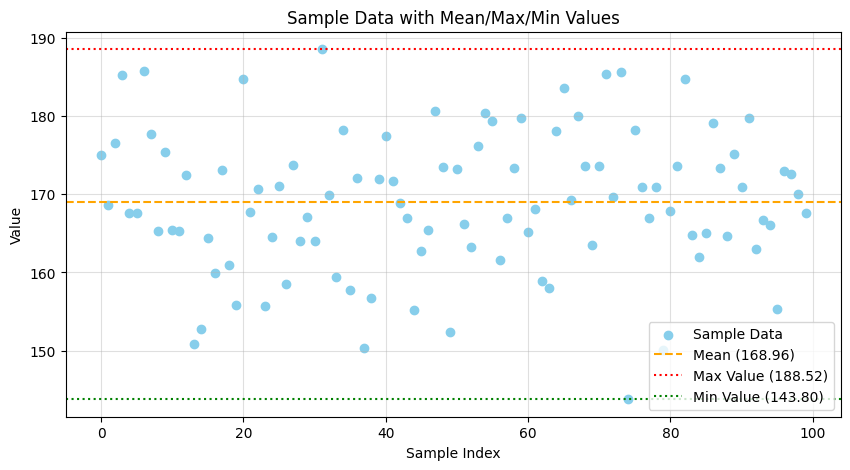

In [ ]:
import matplotlib.pyplot as plt

max_ = np.max(heights)
min_ = np.min(heights)

# 시각화
plt.figure(figsize=(10,5))
plt.scatter(range(len(heights)), heights, color='skyblue', label='Sample Data')
plt.axhline(sample_mean, color='orange', linestyle='--', label=f'Mean ({sample_mean:.2f})')
plt.axhline(max_, color='red', linestyle=':', label=f'Max Value ({max_:.2f})')
plt.axhline(min_, color='green', linestyle=':', label=f'Min Value ({min_:.2f})')
plt.title('Sample Data with Mean/Max/Min Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

#### 신뢰 구간 (Confidence Interval)

위에서 구한 `sample_mean`(표본평균)과 `sample_std` (표본표준편차)를 이용하여 신뢰구간을 계산해봅시다.

In [ ]:
import scipy.stats as stats

def compute_confidence_interval(n, sample_mean, sample_std, confidence=0.95):
    z = stats.norm.ppf((1 + confidence) / 2)  # 95% 신뢰구간일 때 z값 ≈ 1.96

    margin_of_error = z * (sample_std / np.sqrt(n))
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    print(f"신뢰구간: ({ci_lower:.2f} cm, {ci_upper:.2f} cm)")
    return [ci_lower.item(), ci_upper.item()]

In [ ]:
# 평균에 대한 95% 신뢰구간 계산
confidence = 0.95
n = len(heights)
compute_confidence_interval(n, sample_mean, sample_std, confidence)

신뢰구간: (167.18 cm, 170.74 cm)


[167.18155741526738, 170.74151223685067]

실습 문제 0. 99% 신뢰구간 계산해봅시다.

In [1]:
# TODO: code
# 평균에 대한 99% 신뢰구간 계산
# z값도 출력해봅시다.

def compute_confidence_interval_99(n, sample_mean, sample_std, confidence=0.99):
    z = stats.norm.ppf((1 + confidence) / 2)  # 95% 신뢰구간일 때 z값 ≈ 1.96

    margin_of_error = z * (sample_std / np.sqrt(n))
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    print(f"신뢰구간: ({ci_lower:.2f} cm, {ci_upper:.2f} cm)")
    return [ci_lower.item(), ci_upper.item()]

# 평균에 대한 99% 신뢰구간 계산
confidence = 0.99
n = len(heights)
compute_confidence_interval_99(n, sample_mean, sample_std, confidence)

NameError: name 'heights' is not defined

질문. 신뢰구간의 의미를 문장으로 나타내면 무엇일까요?

“모평균이 이 범위 안에 있을 것이다"라는 의미가 맞는 표현인지 생각해봅시다.

**실습 문제 1.**

데이터 샘플 뽑는 과정부터 신뢰구간을 구하는 것까지를 10번 반복해봅시다.

우리는 현재 모평균이 170임을 알고 있으므로, 실제로 우리가 구한 신뢰구가 10개에 170이 몇 번 포함되었는지 세어봅시다.

In [ ]:
# TODO: code
# 1) 데이터 뽑기
# 2) sample mean, sample std 계산하기
# 3) 신뢰구간 구하기
# 1-3)을 10번 반복해서 그 구간 안에 170이 몇 번 포함되었는지 세어봅시다.

시각화

신뢰구간: (168.82 cm, 172.38 cm)


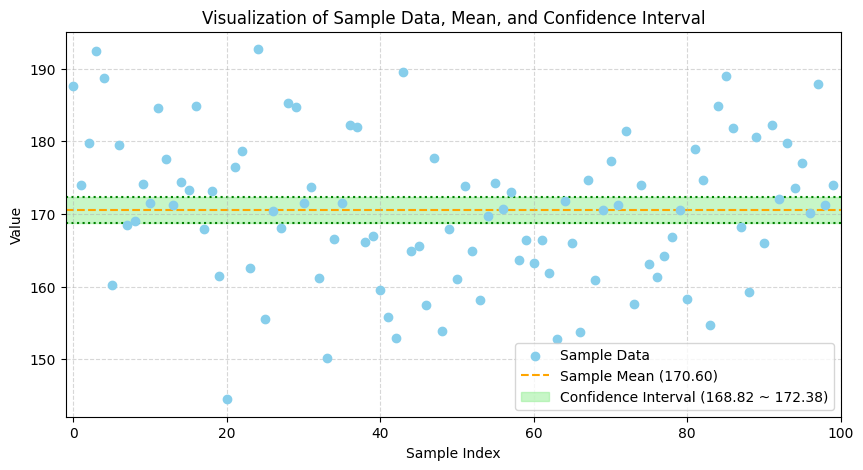

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 샘플 데이터 생성 (정규분포에서 임의 추출)
np.random.seed(0)
data = np.random.normal(loc=170, scale=10, size=100)
n = len(data)
sample_mean = np.mean(data)
sample_std = np.std(heights, ddof=1)
ci_lower, ci_upper = compute_confidence_interval(n, sample_mean, sample_std, 0.95)
# std_err = np.std(data, ddof=1) / np.sqrt(n)
# conf_level = 0.95
# alpha = 1 - conf_level
# t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
# ci_lower = mean - t_crit * std_err
# ci_upper = mean + t_crit * std_err

# 시각화
plt.figure(figsize=(10, 5))

# 1. 데이터 분포 (점으로 표시)
plt.scatter(range(n), data, label='Sample Data', color='skyblue', zorder=2) # Changed label to English

# 2. 평균선
plt.axhline(sample_mean, color='orange', linestyle='--', label=f'Sample Mean ({sample_mean:.2f})', zorder=1) # Changed label to English

# 3. 신뢰구간 영역
plt.fill_between([-1, n], ci_lower, ci_upper, color='lightgreen', alpha=0.5,
                 label=f'Confidence Interval ({ci_lower:.2f} ~ {ci_upper:.2f})', zorder=0) # Changed label to English

# 4. 신뢰구간 경계선
plt.hlines([ci_lower, ci_upper], -1, n, colors='green', linestyles='dotted', zorder=1)

plt.xlim(-1, n)
plt.xlabel("Sample Index") # Changed xlabel to English
plt.ylabel("Value") # Changed ylabel to English
plt.title("Visualization of Sample Data, Mean, and Confidence Interval") # Changed title to English
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- 파란색 히스토그램: 샘플 데이터의 분포

- 주황색 점선: 샘플 평균

- 초록색 구간: 평균, 신뢰구간

정규분포 그래프와 같이 그려봅시다

신뢰구간: (168.61 cm, 172.58 cm)


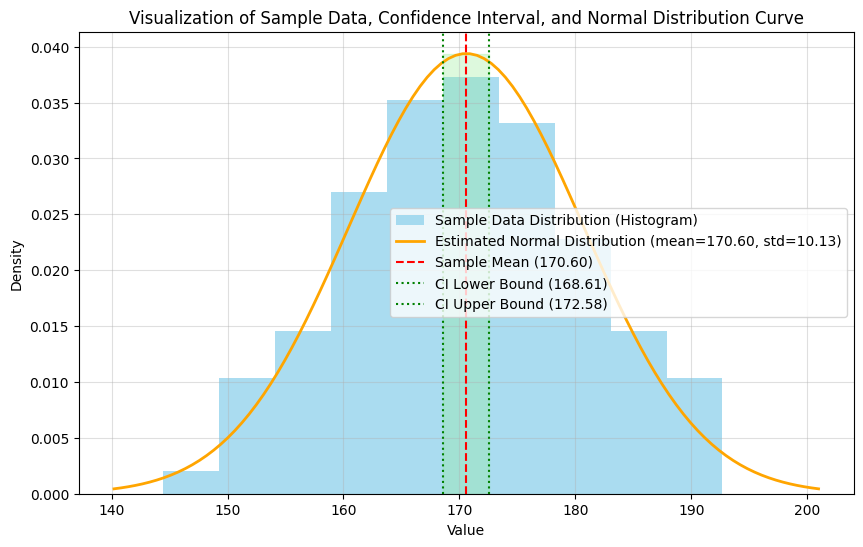

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 샘플 데이터 생성 (정규분포에서 임의 추출)
np.random.seed(0)
data = np.random.normal(loc=170, scale=10, size=100)
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=1)
std_err = std / np.sqrt(n)

# 신뢰구간 계산
conf_level = 0.95
ci_lower, ci_upper = compute_confidence_interval(n, mean, std, conf_level)
# alpha = 1 - conf_level
# t_crit = stats.t.ppf(1 - alpha/2, df=n-1)  #
# ci_lower = mean - t_crit * std_err
# ci_upper = mean + t_crit * std_err

# x축 범위 지정
x = np.linspace(mean - 3*std, mean + 3*std, 100)

# 정규분포 PDF (추정된 모평균과 표준편차로)
pdf = stats.norm.pdf(x, loc=mean, scale=std)

plt.figure(figsize=(10,6))

# 1. 데이터 히스토그램
plt.hist(data, bins=10, color='skyblue', alpha=0.7, density=True, label='Sample Data Distribution (Histogram)')

# 2. 추정된 정규분포 곡선
plt.plot(x, pdf, color='orange', lw=2, label=f'Estimated Normal Distribution (mean={mean:.2f}, std={std:.2f})')

# 3. 평균선
plt.axvline(mean, color='red', linestyle='--', label=f'Sample Mean ({mean:.2f})')

# 4. 신뢰구간
plt.axvline(ci_lower, color='green', linestyle=':', label=f'CI Lower Bound ({ci_lower:.2f})')
plt.axvline(ci_upper, color='green', linestyle=':', label=f'CI Upper Bound ({ci_upper:.2f})')
plt.fill_betweenx([0, max(pdf)], ci_lower, ci_upper, color='lightgreen', alpha=0.3)

plt.title('Visualization of Sample Data, Confidence Interval, and Normal Distribution Curve')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.4)
plt.show()



파란 히스토그램: 샘플 데이터의 실제 분포

주황 곡선: 추정된 정규분포

빨간 점선: 샘플 평균

초록 점선: 신뢰구간 하한/상한

연두색 음영: 신뢰구간 범위

## 가설 검정 (Hypothesis Testing)

### 유의성 검정 (Significance Testing)

In [ ]:
# 모집단 평균이 172cm라고 주장하는 상황
mu_0 = 172

# 단측 검정: 평균이 172보다 작다고 주장할 때
t_statistic, p_value = stats.ttest_1samp(heights, popmean=mu_0)

print(f"t 통계량: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("유의수준 0.05에서 귀무가설을 기각합니다.")
else:
    print("유의수준 0.05에서 귀무가설을 기각할 수 없습니다.")

t 통계량: -3.35
p-value: 0.0012
유의수준 0.05에서 귀무가설을 기각합니다.


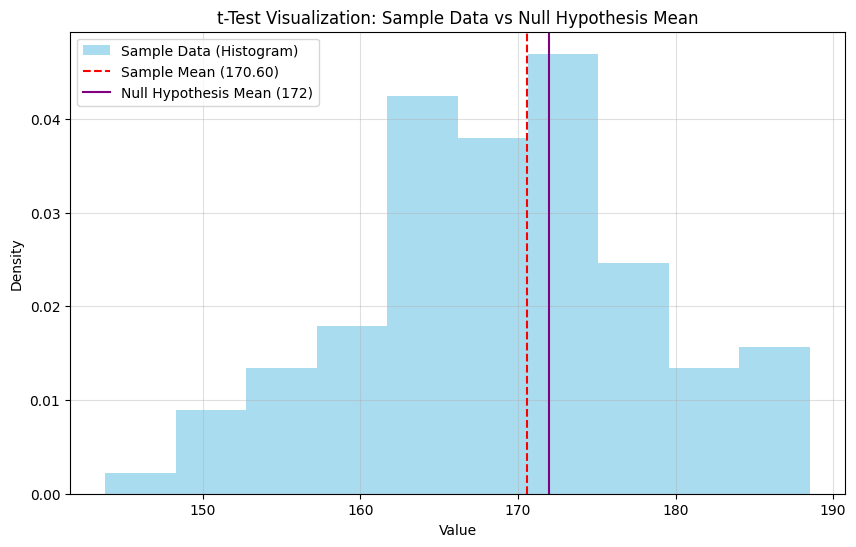

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(heights, bins=10, color='skyblue', alpha=0.7, density=True, label='Sample Data (Histogram)')
plt.axvline(mean, color='red', linestyle='--', label=f'Sample Mean ({mean:.2f})')
plt.axvline(mu_0, color='purple', linestyle='-', label=f'Null Hypothesis Mean ({mu_0})')
plt.title('t-Test Visualization: Sample Data vs Null Hypothesis Mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

실습 문제 2. 만약 모평균이 168이라고 귀무가설을 세우면 결과가 어떻게 달라질까요? 이 결과는 어떤 뜻으로 해석되나요?

In [ ]:
# TODO: code

In [ ]:
# TODO: code - 그래프도 같이 그려봅시다

### 이진 가설 검정 (Binary Hypothesis Testing)

In [ ]:
n = 20
successes = 15
p0 = 0.5

# 이항 검정
p_value = stats.binomtest(successes, n, p=p0, alternative='greater').pvalue
print(f"p-값: {p_value:.4f}")

p-값: 0.0207


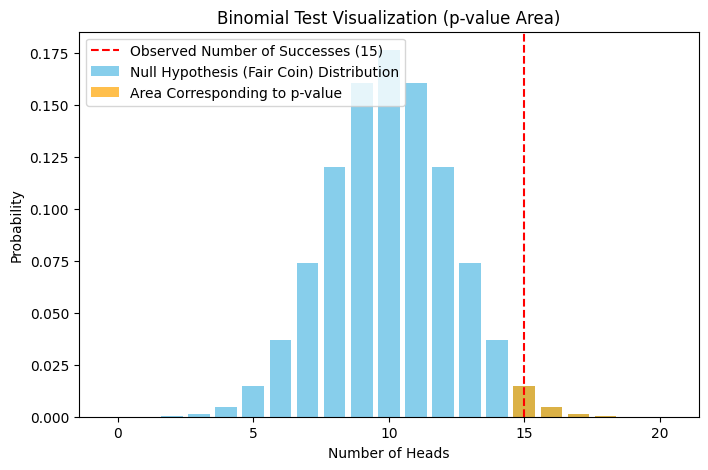

In [ ]:
x = np.arange(n+1)
pmf = stats.binom.pmf(x, n, p0)
plt.figure(figsize=(8,5))
plt.bar(x, pmf, color='skyblue', label='Null Hypothesis (Fair Coin) Distribution')
plt.bar(x[successes:], pmf[successes:], color='orange', alpha=0.7, label='Area Corresponding to p-value')
plt.axvline(successes, color='red', linestyle='--', label=f'Observed Number of Successes ({successes})')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Binomial Test Visualization (p-value Area)')
plt.legend()
plt.show()

실습 문제 2 - 1.

p0를 표본평균 (15/20)으로 설정하고 검증하면 어떤 결과가 나오는지 확인해봅시다.

In [ ]:
n = 20
successes = 15

# TODO: p0 = 15 / 20 으로 두면 p 값이 어떻게 변하는지, 그리고 그래프에서는 어떻게 변하는지 확인해봅시다.


### 다중 가설 검정 (Multiple Hypothesis Test)

In [ ]:
# 여러 그룹(3개) 평균 비교: 일원분산분석(ANOVA)
group1 = np.random.normal(50, 10, size=20)
group2 = np.random.normal(52, 10, size=20)
group3 = np.random.normal(54, 10, size=20)

f_stat, p_value = stats.f_oneway(group1, group2, group3)
print(f"F-통계량: {f_stat:.2f}, p-값: {p_value:.4f}")


F-통계량: 0.25, p-값: 0.7819


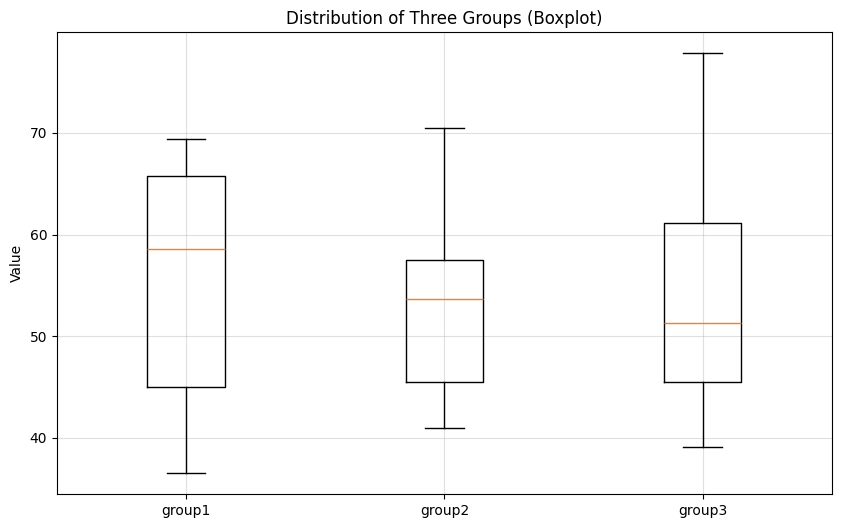

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([group1, group2, group3], labels=['group1', 'group2', 'group3'])
plt.title('Distribution of Three Groups (Boxplot)')
plt.ylabel('Value')
plt.grid(alpha=0.4)
plt.show()

## 확률 변수 추정 (Estimation of a Random Variable)

### Blind Estimation - Minimum Mean Square Error (MMSE)

In [ ]:
# 아무 정보 없이(Blind) 0으로만 예측했을 때와, 샘플의 평균으로 예측했을 때의 평균제곱오차(MSE)를 비교해봅시다.

# X ~ N(0, 1)에서 1000개 샘플 추출
X = np.random.normal(0, 1, 1000)
# 추정값을 '0'으로 예측한다고 가정 (blind)
estimate = 0
mse = np.mean((X - estimate)**2)
print(f"추정값 0일 때 MSE: {mse:.3f}")

# 평균으로 예측할 때 MSE
est_mean = np.mean(X)
mse_mean = np.mean((X - est_mean)**2)
print(f"추정값 sample mean일 때 MSE: {mse_mean:.3f}")


# 추정값을 '3.7'으로 예측한다고 가정 (아무 값이나 가정)
estimate_random = 3.7
mse_random = np.mean((X - estimate_random)**2)
print(f"추정값 3.7일 때 MSE: {mse_random:.3f}") # 큰 error 발생


추정값 0일 때 MSE: 0.958
추정값 sample mean일 때 MSE: 0.958
추정값 3.7일 때 MSE: 14.505


In [ ]:
import numpy as np

def calculate_mse(y_true, y_pred):
    """
    the Mean Squared Error (MSE) 계산하는 함수를 짜봅시다.

    Args:
        y_true (list or np.array): The true values.
        y_pred (list or np.array): The predicted values.

    Returns:
        float: The calculated MSE.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mse = np.mean((y_true - y_pred)**2)
    return mse


y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mse_value = calculate_mse(y_true, y_pred)
print(f"Mean Square Error: {mse_value}")

Mean Square Error: 0.375


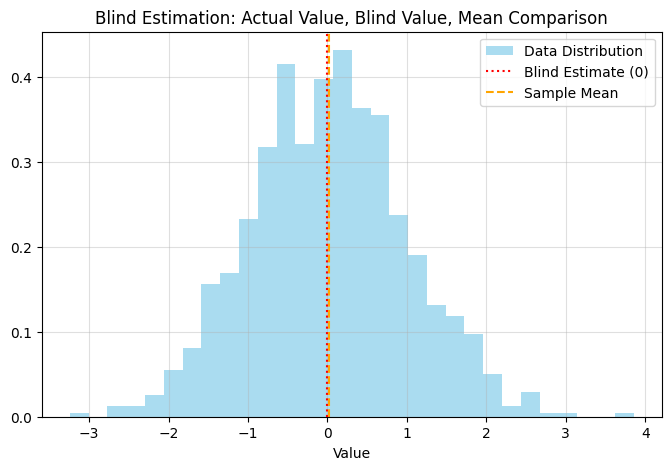

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(X, bins=30, density=True, color='skyblue', alpha=0.7, label='Data Distribution')
plt.axvline(estimate, color='red', linestyle=':', label='Blind Estimate (0)')
plt.axvline(est_mean, color='orange', linestyle='--', label='Sample Mean')
plt.title('Blind Estimation: Actual Value, Blind Value, Mean Comparison')
plt.xlabel('Value')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

실습 문제 3. 만약 X가 N(3, 1) 분포라면 결과가 어떻게 변할까요?

In [ ]:
# TODO: code

### Linear Estimation of X given Y
- Linear mean square error (LMSE)

In [ ]:
# X, Y가 선형 관계를 가질 때
np.random.seed(42)
X = np.random.normal(5, 2, 100)
Y = 2 * X + np.random.normal(0, 1, 100)

# 회귀분석 (Y로부터 X를 선형 추정)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Y.reshape(-1, 1), X)  # ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

print(f"회귀 계수(기울기): {model.coef_[0]:.2f}, 절편: {model.intercept_:.2f}")

# Y값으로 X를 예측했을 때의 MSE
X_pred = model.predict(Y.reshape(-1,1))
mse_lmse = calculate_mse(X, X_pred) # mse_lmse = np.mean((X - X_pred)**2)
print(f"LMSE: {mse_lmse:.3f}")

회귀 계수(기울기): 0.48, 절편: 0.15
LMSE: 0.222


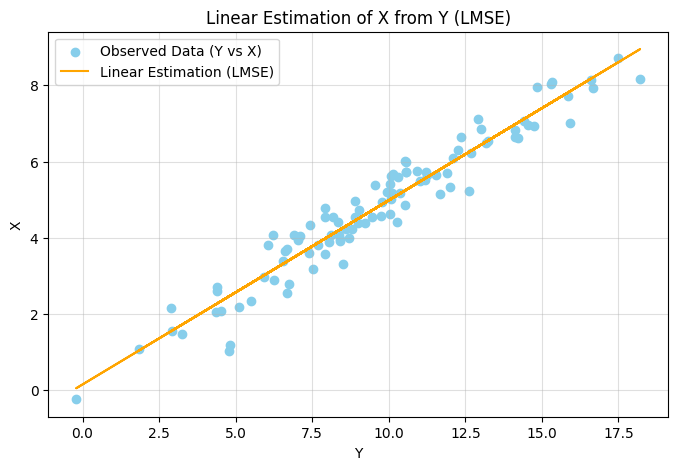

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(Y, X, color='skyblue', label='Observed Data (Y vs X)')
plt.plot(Y, X_pred, color='orange', label='Linear Estimation (LMSE)')
plt.xlabel('Y')
plt.ylabel('X')
plt.title('Linear Estimation of X from Y (LMSE)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

실습 문제 4. X와 Y의 관계(예: Y = 3X + noise)나 noise의 크기를 바꿔서 실험해봅시다.

True a: 3, noise std: 2
coefficient: 0.29, intercept: 0.58
LMSE: 0.323


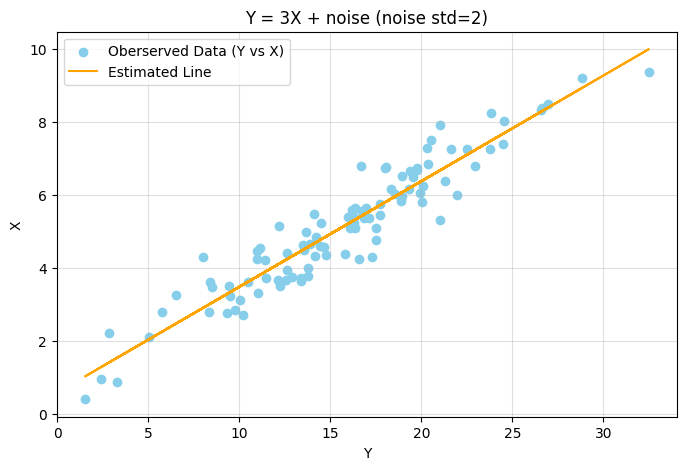

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 실험 파라미터를 여러 가지로 바꿔보면서 그래프를 그려봅시다.
a = 3           # X의 계수
noise_std = 2   # noise 표준편차

np.random.seed(1)
X = np.random.normal(5, 2, 100)
noise = np.random.normal(0, noise_std, 100)
Y = a * X + noise

# 2. 선형 회귀로 X를 Y로 추정
model = LinearRegression()
model.fit(Y.reshape(-1, 1), X)
X_pred = model.predict(Y.reshape(-1,1))
mse_lmse = np.mean((X - X_pred)**2)

print(f"True a: {a}, noise std: {noise_std}")
print(f"coefficient: {model.coef_[0]:.2f}, intercept: {model.intercept_:.2f}")
print(f"LMSE: {mse_lmse:.3f}")

# 3. 시각화
plt.figure(figsize=(8,5))
plt.scatter(Y, X, color='skyblue', label='Oberserved Data (Y vs X)')
plt.plot(Y, X_pred, color='orange', label='Estimated Line')
plt.xlabel('Y')
plt.ylabel('X')
plt.title(f'Y = {a}X + noise (noise std={noise_std})')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


noise_std가 커질수록 데이터가 흩어지고(분산이 커짐),
선형 추정이 점점 어렵게 되는 것을 눈으로 볼 수 있습니다.

a의 값이 커질수록 Y가 X에 더 민감하게 반응하는 것을 볼 수 있습니다.